# Actividad 5: Trabajo con Chunks en Dask
1. Carga un conjunto de datos grande (por ejemplo, un archivo CSV grande) en un Dask DataFrame y explora su estructura y tamaño.
2. Divide el DataFrame en trozos (chunks) más pequeños utilizando el método repartition(). Establece un tamaño de chunk adecuado para el conjunto de datos.
3. Realiza una operación que involucre la agregación o transformación de los datos en los chunks. Por ejemplo, puedes calcular la suma total de una columna en cada chunk y luego combinar los resultados.
4. Mide y compara el tiempo de ejecución de la operación en los chunks con el tiempo de ejecución si se realizara en el DataFrame completo.
5. Compara el uso de memoria entre el procesamiento por chunks y el procesamiento del DataFrame completo.

Primero que nada debemos importar la libreria de Dask **"DataFrame"**, **"graphviz"** para visualizar y **"psutil"** para ver la memoria, esto se hace de la siguiente manera:

In [2]:
import dask.dataframe as dd
import graphviz
import psutil

Ahora podemos cargar a traves de **dd**, el csv con el comando read_csv, el nombre del archivo y la separación en mi caso es con ;.

In [3]:
df = dd.read_csv('ley-de-presupuestos-inicial-y-vigente_nivel-programa_a-diciembre-2022-no-covid_19.csv',sep=';')

Podemos darle una vista preliminar al dataframe:

In [4]:
df

,Año,Mes,Moneda,Partida,Nombre Partida,Capítulo,Nombre Capítulo,Programa,Nombre Programa,Subtítulo,Nombre Subtítulo,Item,Nombre Item,Asignación,Monto Ley Inicial,Monto Ley Vigente a DICIEMBRE
npartitions=1,,,,,,,,,,,,,,,,
,int64,object,object,int64,object,int64,object,int64,object,int64,object,float64,object,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Vemos la carga:

In [5]:
df.head()

,Año,Mes,Moneda,Partida,Nombre Partida,Capítulo,Nombre Capítulo,Programa,Nombre Programa,Subtítulo,Nombre Subtítulo,Item,Nombre Item,Asignación,Monto Ley Inicial,Monto Ley Vigente a DICIEMBRE
0,2022,Diciembre,DOLARES,6,MINISTERIO DE RELACIONES EXTERIORES,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,8,OTROS INGRESOS CORRIENTES,NaN,NaN,NaN,1524,1524
1,2022,Diciembre,DOLARES,6,MINISTERIO DE RELACIONES EXTERIORES,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,8,OTROS INGRESOS CORRIENTES,2.0,Multas y Sanciones Pecuniarias,NaN,10,10
2,2022,Diciembre,DOLARES,6,MINISTERIO DE RELACIONES EXTERIORES,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,8,OTROS INGRESOS CORRIENTES,99.0,Otros,NaN,1514,1514
3,2022,Diciembre,DOLARES,6,MINISTERIO DE RELACIONES EXTERIORES,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,9,APORTE FISCAL,NaN,NaN,NaN,147293,159916
4,2022,Diciembre,DOLARES,6,MINISTERIO DE RELACIONES EXTERIORES,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,1,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,9,APORTE FISCAL,1.0,Libre,NaN,147293,159916


Comprobamos que los ultimos valores para saber cuantas columnas tiene.

In [6]:
df.tail()

,Año,Mes,Moneda,Partida,Nombre Partida,Capítulo,Nombre Capítulo,Programa,Nombre Programa,Subtítulo,Nombre Subtítulo,Item,Nombre Item,Asignación,Monto Ley Inicial,Monto Ley Vigente a DICIEMBRE
12141,2022,Diciembre,PESOS,50,TESORO PÚBLICO,1,FISCO,12,FONDO DE CONTINGENCIA ESTRATÉGICO,24,TRANSFERENCIAS CORRIENTES,2.0,Al Gobierno Central,NaN,10,0
12142,2022,Diciembre,PESOS,50,TESORO PÚBLICO,1,FISCO,12,FONDO DE CONTINGENCIA ESTRATÉGICO,24,TRANSFERENCIAS CORRIENTES,2.0,Al Gobierno Central,100.0,10,0
12143,2022,Diciembre,PESOS,50,TESORO PÚBLICO,1,FISCO,12,FONDO DE CONTINGENCIA ESTRATÉGICO,30,ADQUISICIÓN DE ACTIVOS FINANCIEROS,NaN,NaN,NaN,20,0
12144,2022,Diciembre,PESOS,50,TESORO PÚBLICO,1,FISCO,12,FONDO DE CONTINGENCIA ESTRATÉGICO,30,ADQUISICIÓN DE ACTIVOS FINANCIEROS,1.0,Compra de Títulos y Valores,NaN,10,0
12145,2022,Diciembre,PESOS,50,TESORO PÚBLICO,1,FISCO,12,FONDO DE CONTINGENCIA ESTRATÉGICO,30,ADQUISICIÓN DE ACTIVOS FINANCIEROS,99.0,Otros Activos Financieros,NaN,10,0


## Comprobamos la primera repartición de los chunks
Como el total de datos son 12145, lo divideré en 13 para que queden aproximado 1000 valores en cada uno.
Esto lo haremos con **"df.repartition"** y para decirle la cantidad de chunks, utilizaremos **"npartitions"** como parametros y lo settearemos en 13

In [7]:
nuevo_df = df.repartition(npartitions=13)

In [8]:
nuevo_df

,Año,Mes,Moneda,Partida,Nombre Partida,Capítulo,Nombre Capítulo,Programa,Nombre Programa,Subtítulo,Nombre Subtítulo,Item,Nombre Item,Asignación,Monto Ley Inicial,Monto Ley Vigente a DICIEMBRE
npartitions=13,,,,,,,,,,,,,,,,
,int64,object,object,int64,object,int64,object,int64,object,int64,object,float64,object,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Podemos observar ahora los graficos correspondientes a cada uno tanto del **df** normal como el **df_nuevo**

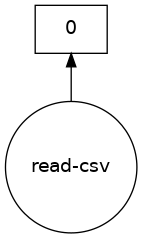

In [9]:
df.visualize(filename='dask.png')

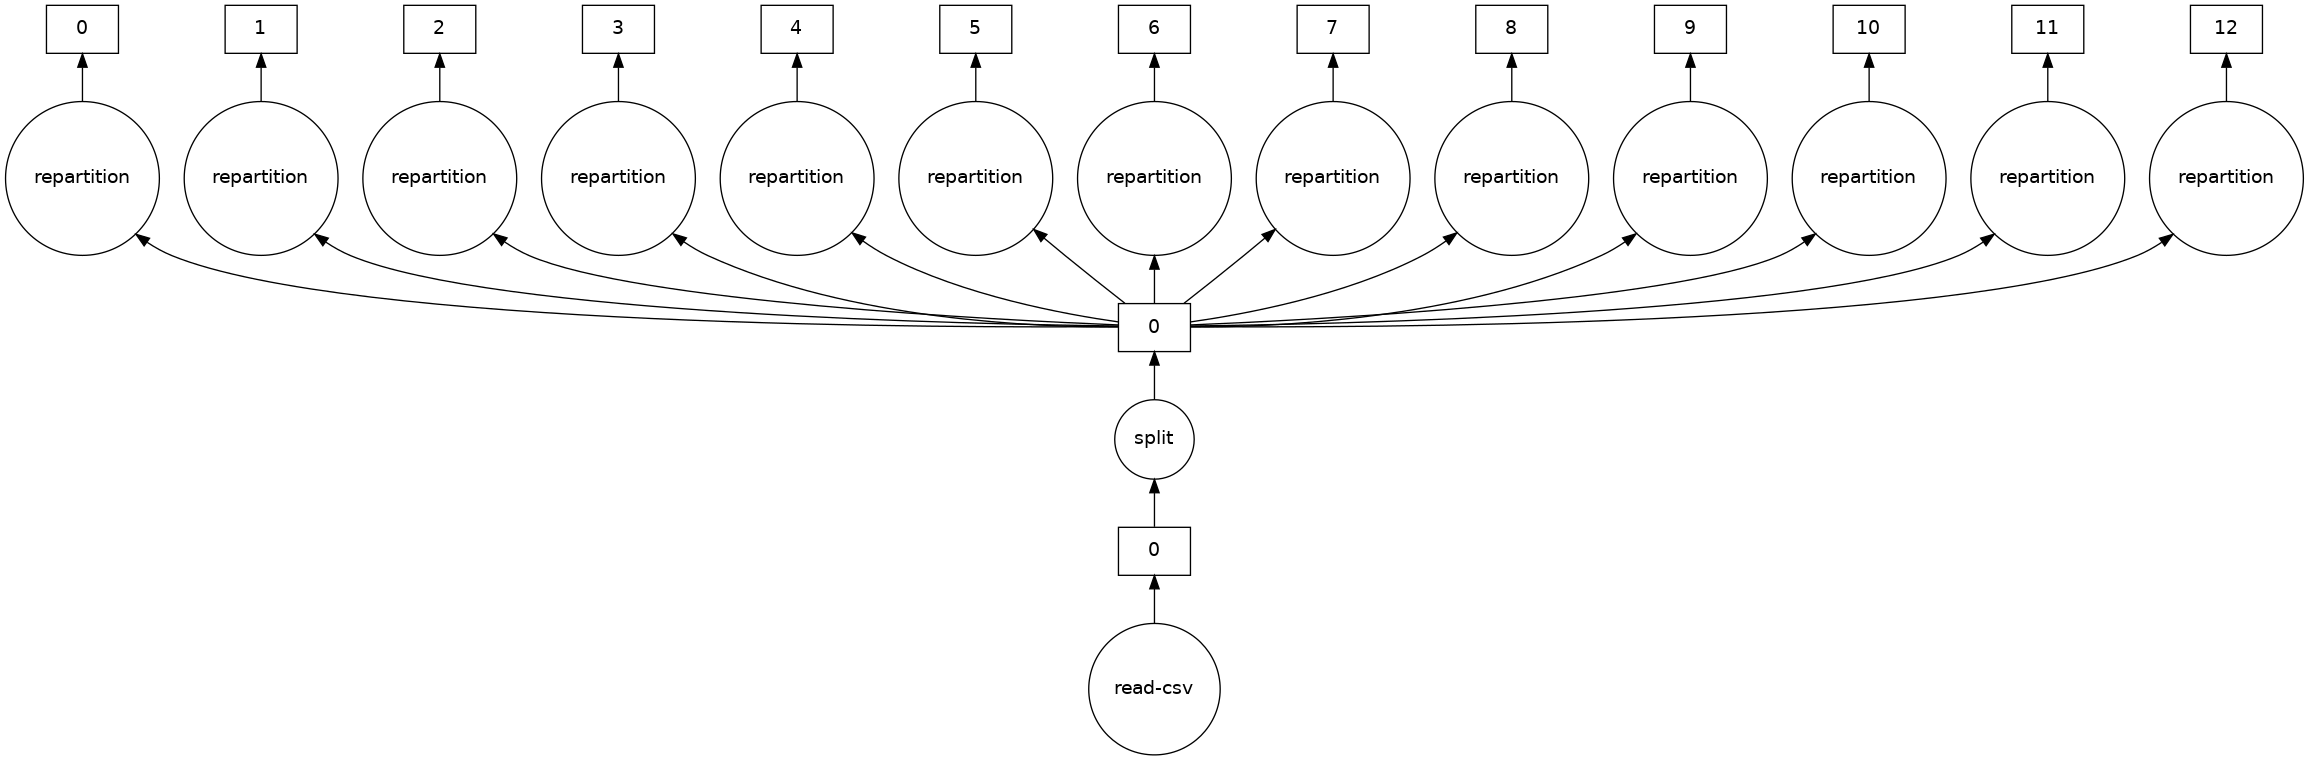

In [10]:
nuevo_df.visualize(filename='dask2.png')


Se puede apreciar claramente la diferencia entre cada uno de estos graficos donde muestra las 13 reparticiones que dividimos la tabla


## Realizamos operaciones con los Dataframes normal y Repartidos
### Dataframe "Normal"
Aqui realizaremos la suma de los valores en _"Monto ley inicial"_, además de ir mostrando la **memoria utilizada** y el **tiempo tomado** en cada uno de estas ejecuciones.
Para tomar la memoria, usaremos la libreria **psutil**, con la función de *__virtual_memory.used__* para comprobar la memoria utilizada antes de realizar la operación. 

In [11]:
Memoria_Antes_Normal = psutil.virtual_memory().used

Aqui pondremos la función **"sum_partition"**, la cual tiene la unica función de sumar por particion, y devolver ese valor.

In [12]:
def sum_partition(partition):
    return partition['Monto Ley Inicial'].sum()

Aquí es donde es llamada la función sum_partition, y además utilizaremos el comando **%%time** para ir tomando el tiempo realizado para la ejecución.

In [13]:
%%time
sums = df.map_partitions(sum_partition)

CPU times: user 99 µs, sys: 15.7 ms, total: 15.8 ms
Wall time: 13.7 ms


En esta sección realizaremos la ejecución a traves del comando __compute()__, pero con una variación debido a que si intentaba realizar la suma y realizar la computación generaba errores por lo cual usando el parametro **_"scheduler="threads"_**, asegura que se haga la suma, evitando problemas de incopatibilidad.

In [35]:
%%time
total_sum = sums.compute(scheduler="threads")

CPU times: user 61.9 ms, sys: 20.7 ms, total: 82.6 ms
Wall time: 79.2 ms


Por ultimo comprobamos la cantidad que nos da el valor total.

In [15]:
%%time
total_sum.sum()

CPU times: user 306 µs, sys: 0 ns, total: 306 µs
Wall time: 316 µs


697787811551

In [16]:
Memoria_Despues_Normal = psutil.virtual_memory().used

Y mostramos el uso de memoria, antes y despues de realizar la operación.

In [17]:
print("Uso de memoria del sistema antes de las operaciones:", Memoria_Antes_Normal / (1024 * 1024), "MB")
print("Uso de memoria del sistema Despues de las operaciones:", Memoria_Despues_Normal / (1024 * 1024), "MB")

Uso de memoria del sistema antes de las operaciones: 1579.43359375 MB
Uso de memoria del sistema Despues de las operaciones: 1579.41796875 MB


### Dataframe con 13 Chunks.
Para esta sección realizamos las mismas operaciones descritas con anterioridad.

In [18]:
Memoria_Antes_Chunk13 = psutil.virtual_memory().used

In [19]:
%%time
nueva_suma = nuevo_df.map_partitions(sum_partition)

CPU times: user 23.4 ms, sys: 1.44 ms, total: 24.9 ms
Wall time: 24.4 ms


In [20]:
%%time
total_nueva_suma = nueva_suma.compute(scheduler="threads")

CPU times: user 73.2 ms, sys: 1.12 ms, total: 74.3 ms
Wall time: 72.2 ms


Aqui presentamos un cambio, ya que podemos ver los valores de cada uno de los chunks, por separados antes de ser sumados en uno solo.

In [21]:
total_nueva_suma

0       6861871948
1      19482463497
2      38588791782
3      12510636231
4      22453248350
5      20794294508
6      50581999903
7     115004241010
8      20432885152
9      18777142716
10     18548849976
11      6450940717
12    347300445761
dtype: int64

In [22]:
%%time
total_nueva_suma.sum()

CPU times: user 172 µs, sys: 76 µs, total: 248 µs
Wall time: 256 µs


697787811551

In [23]:
Memoria_Despues_Chunk13 = psutil.virtual_memory().used

In [24]:
print("Uso de memoria del sistema antes de las operaciones:", Memoria_Antes_Chunk13/ (1024 * 1024), "MB")
print("Uso de memoria del sistema Despues de las operaciones:", Memoria_Despues_Chunk13 / (1024 * 1024), "MB")

Uso de memoria del sistema antes de las operaciones: 1579.41796875 MB
Uso de memoria del sistema Despues de las operaciones: 1583.8828125 MB


Como se puede apreciar, los datos si comparamos los valores de las operaciones tanto en memoria como en tiempo de realizar la operación vemos un **aumento** para cuando utilizamos los Chunks, esto puede deberse a que no estamos usando las divisiones de chunks correctas, por lo cual intente realizar un nueva operación pero dividiendo en mas Chunks. 

### Dataframe con 65 Chunks.
Aqui realizamos las mismas operaciones que fueron ejecutadas con anterioridad. (la cantidad de 65 Chunks, fue de multiplicar los 13 x 5)

In [25]:
nuevo_mayor_df = df.repartition(npartitions=65)

In [26]:
nuevo_mayor_df

,Año,Mes,Moneda,Partida,Nombre Partida,Capítulo,Nombre Capítulo,Programa,Nombre Programa,Subtítulo,Nombre Subtítulo,Item,Nombre Item,Asignación,Monto Ley Inicial,Monto Ley Vigente a DICIEMBRE
npartitions=65,,,,,,,,,,,,,,,,
,int64,object,object,int64,object,int64,object,int64,object,int64,object,float64,object,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Comos se puede apreciar, la división es tanta que no se alcanzan a distinguir correctamente los valores de los chunks en la grafica.

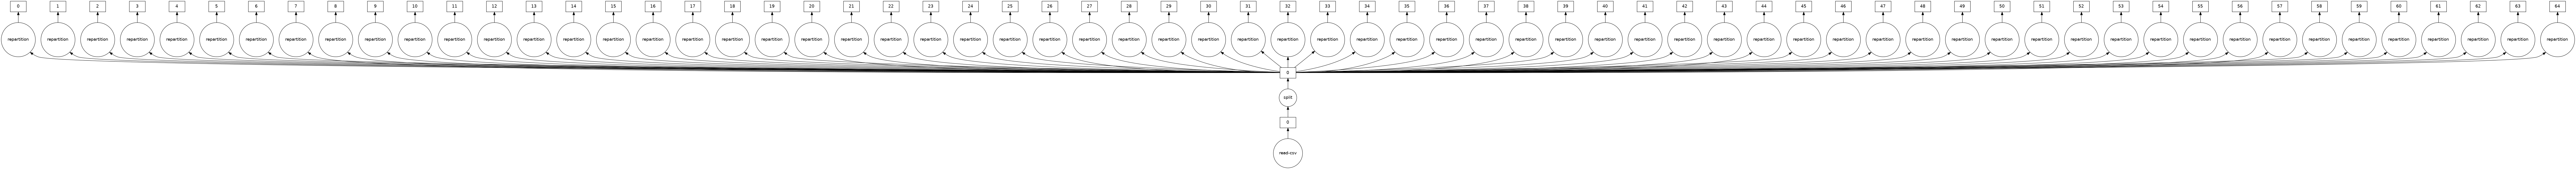

In [27]:
nuevo_mayor_df.visualize(filename='dask3.png')

In [28]:
Memoria_Antes_Chunk65 = psutil.virtual_memory().used

In [29]:
%%time
nueva_mayor_suma = nuevo_mayor_df.map_partitions(sum_partition)

CPU times: user 2.65 ms, sys: 6.76 ms, total: 9.41 ms
Wall time: 9.11 ms


In [30]:
%%time
total_nueva_suma2 = nueva_mayor_suma.compute(scheduler="threads")

CPU times: user 80.3 ms, sys: 14.4 ms, total: 94.7 ms
Wall time: 91 ms


In [31]:
total_nueva_suma2

0          1057407
1        293400363
2       2432483107
3       2376073942
4       1758857129
          ...     
60      1035259865
61      2902888712
62    179755964150
63    101116753666
64     62489579368
Length: 65, dtype: int64

In [32]:
%%time
total_nueva_suma2.sum()

CPU times: user 173 µs, sys: 79 µs, total: 252 µs
Wall time: 263 µs


697787811551

In [33]:
Memoria_Despues_Chunk65 = psutil.virtual_memory().used

In [34]:
print("Uso de memoria del sistema antes de las operaciones:", Memoria_Antes_Chunk65/ (1024 * 1024), "MB")
print("Uso de memoria del sistema Despues de las operaciones:", Memoria_Despues_Chunk65 / (1024 * 1024), "MB")

Uso de memoria del sistema antes de las operaciones: 1599.11328125 MB
Uso de memoria del sistema Despues de las operaciones: 1603.7890625 MB


Por último podemos apreciar que aun no encontramos un valor que ayude a reducir el valor normal de la operación, esto deja tambien pensar que es donde se encuentran en las operaciones ya que estan al final de la operación, puede ser que no se limpie correctamente los datos de la memoria por lo cual la memoria este aun llena de información.